In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
%matplotlib inline

df = pd.read_csv('./febrile_seizures.csv')
df.head()

,Gender,Social Status,Age,Education level,Working in health,Where are you living,child had convulsions,Temperature cause convulsions,Spasm is a type of epilepsy,Is it dangerous up to 5 years,...,Child with cramps should be placed on his left or right side,necessary to observe the apparent child characteristics,Child should be taken to the doctor immediately,Put anything inside child mouth prevent child from biting his teeth with force,Child must be resuscitated by introducing air through mouth,Secretions should be withdrawn,Heart must be refreshed,Dealing with a child when has a cramp,having thermometer at home,Know how to use thermometer
0,male,Single,20 - 25,college,Health,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,No,No,Yes,No,Yes,Yes,Yes
1,Female,Single,20 - 25,college,nonH,Eastern,No,Yes,Dont Know,Yes,...,Dont Know,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,No,Yes
2,male,Married,26 - 40,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Dont Know,No,No,No,Dont Know,Yes,Yes
3,Female,Married,40 - 60,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Yes,Yes,Yes,Dont Know,No,Yes,Yes
4,Female,Married,40 - 60,college,Health,Eastern,No,Yes,Yes,Yes,...,Dont Know,Yes,No,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Yes,Yes


In [2]:
# We are intersted in persons working in Health

# The number of Participants working in health, 77 working in health , 750 not working in health
health_df = df[df['Working in health'] == 'Health']
not_health_df = df[df['Working in health'] == 'nonH']
not_health_df.shape

(750, 37)

In [3]:
# The answers of brain damge question (working in health Participants) 

health_df['is it lead to brain damage'].value_counts()/(health_df.shape[0] - sum(health_df['is it lead to brain damage'].isnull()))

Yes          0.701299
Dont Know    0.220779
No           0.077922
Name: is it lead to brain damage, dtype: float64

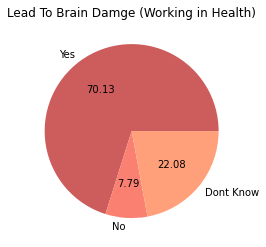

In [4]:
# Pie chart of brain damge question (Working in Health Participants)   

yes = health_df.loc[health_df['is it lead to brain damage'] == 'Yes'].count()[0]
no = health_df.loc[health_df['is it lead to brain damage'] == 'No'].count()[0]
dont = health_df.loc[health_df['is it lead to brain damage'] == 'Dont Know'].count()[0]
labels = ['Yes', 'No', 'Dont Know']
colors = ['#CD5C5C','#FA8072','#FFA07A',]

plt.pie([yes , no , dont] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Lead To Brain Damge (Working in Health)")
plt.show()

In [5]:
# The percentage of answers for brain damge question (Regular Participants) 



not_health_df['is it lead to brain damage'].value_counts()/(not_health_df.shape[0] - sum(not_health_df['is it lead to brain damage'].isnull()))

Yes          0.717333
Dont Know    0.253333
No           0.029333
Name: is it lead to brain damage, dtype: float64

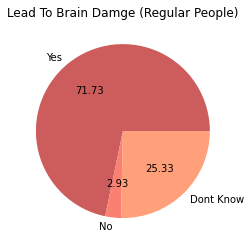

In [6]:
# Pie Chart brain damge question (Regular Participants) 

yes = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'Yes'].count()[0]
no = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'No'].count()[0]
dont = not_health_df.loc[not_health_df['is it lead to brain damage'] == 'Dont Know'].count()[0]
labels = ['Yes', 'No', 'Dont Know']
colors = ['#CD5C5C','#FA8072','#FFA07A',]

plt.pie([yes , no , dont] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Lead To Brain Damge (Regular People)")
plt.show()

In [7]:
# We are intersted here in Education level

# College Level = 552
# High level = 152
# Phd Level = 104
# less = 19

college_df = df[df['Education level'] == 'college']
high_df = df[df['Education level'] == 'high']
phd_df = df[df['Education level'] == 'phd']
less_df = df[df['Education level'] == 'Less']
college_df.shape

(552, 37)

In [8]:
# The number of answers for is it lead to death question (Depend on College level of participants) 

college_df['is it lead to death'].value_counts()

Dont Know    283
Yes          233
No            36
Name: is it lead to death, dtype: int64

In [9]:
# The percentage of answers for is it lead to death question (Depend on College level of participants) 

college_df['is it lead to death'].value_counts()/(college_df.shape[0] - sum(college_df['is it lead to death'].isnull()))

Dont Know    0.512681
Yes          0.422101
No           0.065217
Name: is it lead to death, dtype: float64

In [10]:
# The number of answers for is it lead to death question (Depend on High level of participants) 

high_df['is it lead to death'].value_counts()

Dont Know    86
Yes          49
No           17
Name: is it lead to death, dtype: int64

In [11]:
# The percentage of answers for is it lead to death question (Depend on High level of participants) 

high_df['is it lead to death'].value_counts()/(high_df.shape[0] - sum(high_df['is it lead to death'].isnull()))

Dont Know    0.565789
Yes          0.322368
No           0.111842
Name: is it lead to death, dtype: float64

In [12]:
# The number of answers for is it lead to death question (Depend on Phd level of participants) 

phd_df['is it lead to death'].value_counts()

Dont Know    49
Yes          46
No            9
Name: is it lead to death, dtype: int64

In [13]:
# The percentage of answers for is it lead to death question (Depend on Phd level of participants) 

phd_df['is it lead to death'].value_counts()/(phd_df.shape[0] - sum(phd_df['is it lead to death'].isnull()))

Dont Know    0.471154
Yes          0.442308
No           0.086538
Name: is it lead to death, dtype: float64

In [14]:
# The number of answers for is it lead to death question (Depend on less level of participants) 

less_df['is it lead to death'].value_counts()

Dont Know    11
Yes           6
No            2
Name: is it lead to death, dtype: int64

In [15]:
# The percentage of answers for is it lead to death question (Depend on less level of participants) 

less_df['is it lead to death'].value_counts()/(less_df.shape[0] - sum(less_df['is it lead to death'].isnull()))

Dont Know    0.578947
Yes          0.315789
No           0.105263
Name: is it lead to death, dtype: float64